In [47]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, precision_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

# Naive Bayes

In [25]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con las características y etiquetas
df = pd.DataFrame(data=iris.data, columns=['sepal_length', ' sepal_width', ' petal_length', ' petal width'])
df['class'] = iris.target  # Agregar la columna de etiquetas al DataFrame

df.head()

,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# Separar el conjunto de caracteristicas 'X' y la variable objetivo 'Y'
attributes = df.drop(['class'], axis=1)
target = df['class']

In [27]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=6)
Y_train = X_train['class']
y_test = X_test['class']

print('tamaño de los datos')
print('train: ', X_train.shape[0])
print('test: ', X_test.shape[0])
print('total: ', X_train.shape[0] + X_test.shape[0])

tamaño de los datos
train:  105
test:  45
total:  150


In [28]:
#Entrenar el modelo
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    Y_train
)

GaussianNB()

In [29]:
#Aplicar modelo a los datos de test
y_pred = gnb.predict(X_test)

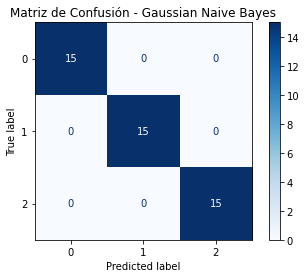

In [30]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gnb.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Gaussian Naive Bayes')
plt.show()

In [38]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}\n')

# Calcular el error de clasificación
classification_error = 1 - accuracy
print(f'Error de clasificación del modelo: {classification_error}\n')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision}\n')

# Calcular el índice de recuperación del modelo
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Índice de recuperación del modelo: {recall}\n')

# Calcular la medida F1 del modelo
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Medida F1 del modelo: {f1}\n')



Exactitud del modelo: 1.0

Error de clasificación del modelo: 0.0

Precisión del modelo: 1.0

Índice de recuperación del modelo: 1.0

Medida F1 del modelo: 1.0



Observando las mediciones del modelo gausiano, podemos ver que tomando una muestra del 70% par entrenar y 30% para testear, el modelo tuvo un desempeño perfect, teniendo una exactitud, precisión, recall y F1 de 1. El modelo tuvo un error de 0

# KNN

In [39]:
from collections import Counter
import numpy as np

# Datos de entrada
X = np.array([
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 1, 0, 0]
])

# Etiquetas de los grupos
labels = np.array(['C1', 'C1', 'C2', 'C2', 'C1', 'C2'])

# Función para calcular la distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Función k-NN
def k_nearest_neighbors(X, y, query_point, k):
    distances = [euclidean_distance(query_point, x) for x in X]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Ejemplos a clasificar
queries = [
    np.array([1, 1, 0, 1, 1]),
    np.array([1, 1, 0, 1, 1]),
    np.array([0, 1, 0, 0, 0]),
    np.array([0, 1, 0, 0, 0])
]

# Realizar la clasificación con k-NN para cada ejemplo
for i, query in enumerate(queries, start=1):
    k_values = [1, 3, 1, 5]
    for j, k in enumerate(k_values, start=1):
        result = k_nearest_neighbors(X, labels, query, k)
        print(f"Resultado para Y={query} con K={k} es: {result}")


Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=3 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=5 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=3 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=5 es: C1
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=3 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=5 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=3 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=5 es: C2


Para el primer ejemplo [1, 1, 0, 1, 1], sin importar el valor de k utilizado (1, 3 o 5), el algoritmo predijo que pertenece al grupo C1. Esto indica que los puntos más cercanos a este ejemplo pertenecen principalmente al grupo C1.

Para el segundo ejemplo [0, 1, 0, 0, 0], nuevamente, independientemente del valor de k (1, 3 o 5), el algoritmo predijo consistentemente que pertenece al grupo C2. Esto sugiere que los puntos más cercanos a este ejemplo son predominantemente del grupo C2.

Podemos concluir que los datos de cada cluster son consistentes y tienen una separación clara

# Comparación de módelos

In [48]:

# Descargar el conjunto de datos desde una URL (si no lo tienes localmente)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Definir los nombres de las columnas para el dataset
column_names = [
    "Status of existing checking account", "Duration in months", "Credit history", 
    "Purpose", "Credit amount", "Savings account/bonds", "Present employment since", 
    "Installment rate in percentage of disposable income", "Personal status and sex", 
    "Other debtors / guarantors", "Present residence since", "Property", "Age", 
    "Other installment plans", "Housing", "Number of existing credits at this bank", 
    "Job", "Number of people being liable to provide maintenance for", "Telephone", 
    "Foreign worker", "Credit risk"
]

# Cargar el conjunto de datos en un DataFrame de pandas
data = pd.read_csv(url, delimiter=' ', names=column_names)

# Mostrar información básica del conjunto de datos
print("Información sobre el conjunto de datos German Credit:")
print(data.head().to_string())  # Muestra las primeras filas del conjunto de datos
print(data.shape)   # Muestra la forma (número de filas y columnas) del conjunto de datos


Información sobre el conjunto de datos German Credit:
  Status of existing checking account  Duration in months Credit history Purpose  Credit amount Savings account/bonds Present employment since  Installment rate in percentage of disposable income Personal status and sex Other debtors / guarantors  Present residence since Property  Age Other installment plans Housing  Number of existing credits at this bank   Job  Number of people being liable to provide maintenance for Telephone Foreign worker  Credit risk
0                                 A11                   6            A34     A43           1169                   A65                      A75                                                    4                     A93                       A101                        4     A121   67                    A143    A152                                        2  A173                                                         1      A192           A201            1
1                       

In [49]:
# Naive bayes con validación cruzada

X = data.drop('Credit risk', axis=1)  # Características
y = data['Credit risk']  # Etiquetas

# Convertir las variables categóricas a numéricas si es necesario
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

### Naive Bayes

In [50]:
# Inicializar el clasificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()

# Realizar validación cruzada con tamaño 10 para evaluar el modelo
scores = cross_val_score(naive_bayes, X, y, cv=10)

# Mostrar los puntajes de la validación cruzada
print("Puntajes de validación cruzada:", scores)
print(f"Puntuación media: {scores.mean():.4f}")

Puntajes de validación cruzada: [0.72 0.66 0.76 0.68 0.74 0.78 0.69 0.74 0.78 0.79]
Puntuación media: 0.7340


### Árbol de Decisión

In [60]:
# Inicializar el clasificador de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=32)

# Realizar validación cruzada para evaluar el modelo
scores = cross_val_score(decision_tree, X, y, cv=10)

# Mostrar los puntajes de la validación cruzada
print("Puntajes de validación cruzada:", scores)
print(f"Puntuación media: {scores.mean():.4f}")

Puntajes de validación cruzada: [0.63 0.62 0.75 0.72 0.64 0.66 0.66 0.71 0.65 0.71]
Puntuación media: 0.6750


### Comparación

Para este dataset, el rendimiento de Naive Bayes fue mayor al del Árbol de decisión. Esto puede deberse a la naturaleza de los datos. Naive Bayes supone la independencia condicional entre los atributos. lo que para este dataset funcina. Los arboles de decisión pueden tener dificultades cuando el dataset tien ruido o outliers. Esto puede ser un factor determinante en el ejercicio.    